* Name: Ankit Gupta
* Batch: DEC-A24
* Discipline: Data Science




---
IRIS FLOWER CLASSIFICATION





Importing Required Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Importing the IRIS dataset

In [3]:
iris = pd.read_csv('IRIS.csv')

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Displaying the first few rows of the dataset

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Identifying the Dimensions of the dataset

In [6]:
iris.shape

(150, 5)

Lets Check the Missing Values

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Generating Descriptive Statistics about the Numerical Columns in a DataFrame

In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking the Count of Missing Values in each Column of the Iris dataset

In [9]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Removing and Modifying Duplicate Rows

In [10]:
iris.drop_duplicates(inplace=True)

Displaying the New Dimensions

In [42]:
iris.shape

(147, 5)

Removing the unwanted Substring from the 'Species' column

In [44]:
iris['species'] = iris['species'].astype(str).str.replace('Iris-','', regex = True)

In [13]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Species Distribution

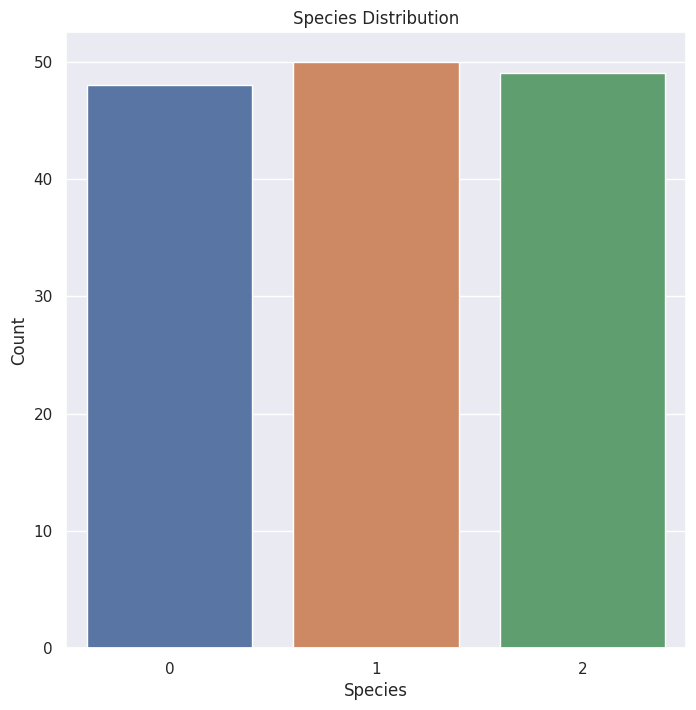

In [45]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))

sns.countplot(x='species',data=iris)

plt.title("Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")

plt.show()

In [48]:
print(iris['species'].value_counts())

1    50
2    49
0    48
Name: species, dtype: int64


Scatter plot for Sapel length and Petal length

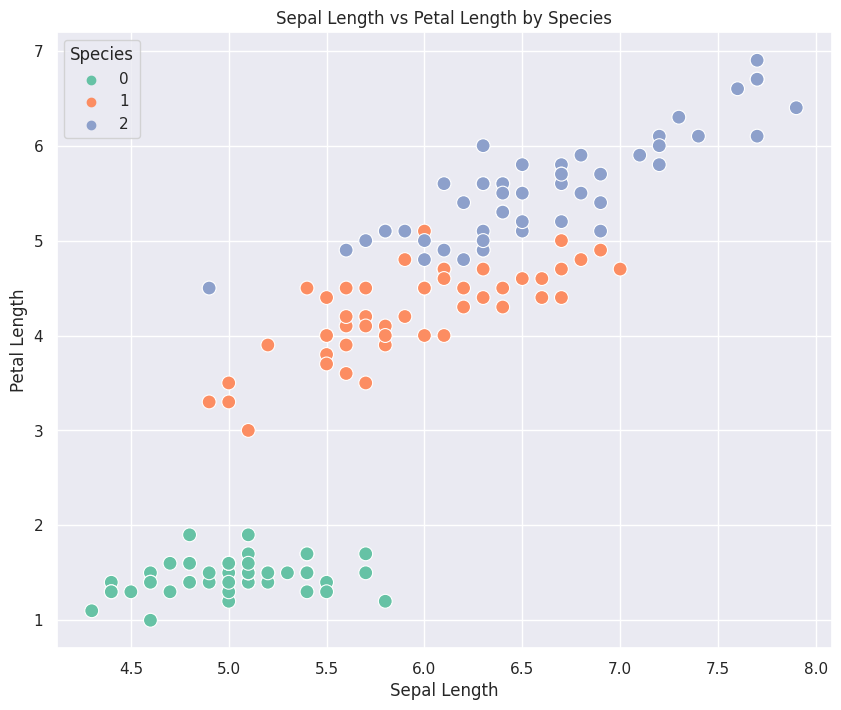

In [47]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))

sns.scatterplot(x="sepal_length", y="petal_length", hue="species", data=iris, palette="Set2", s=100)

plt.title("Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend(title="Species")

plt.show()

Scatter plot for Sepal Width and Petal Width By Species

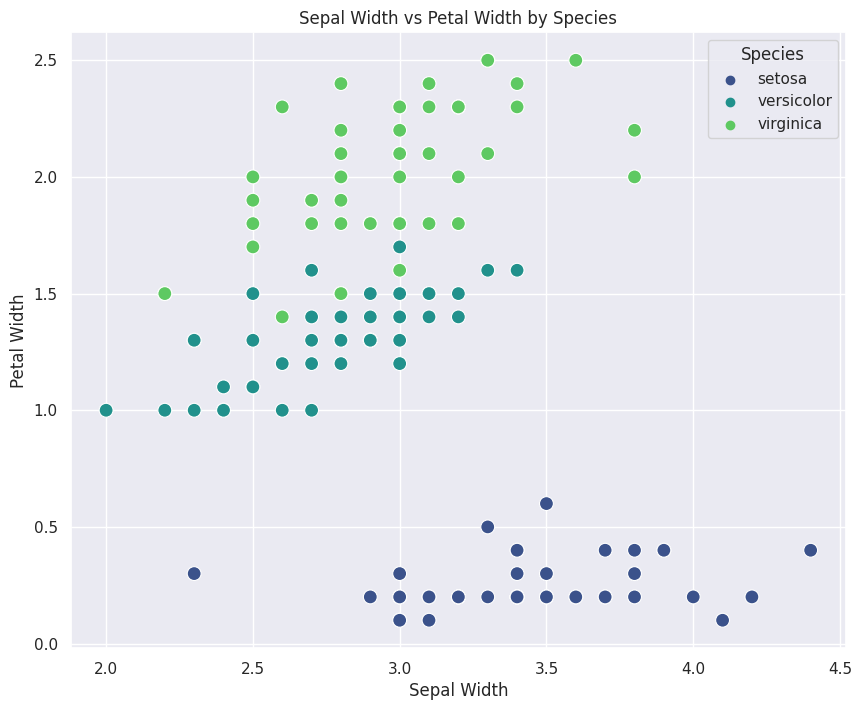

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))

sns.scatterplot(x="sepal_width", y="petal_width", hue="species", data=iris, palette="viridis", s=100)

plt.title("Sepal Width vs Petal Width by Species")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend(title="Species")

plt.show()

Correlation between the cplumns

In [18]:
correlation = iris.corr()

<ipython-input-18-2081d5203797>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = iris.corr()


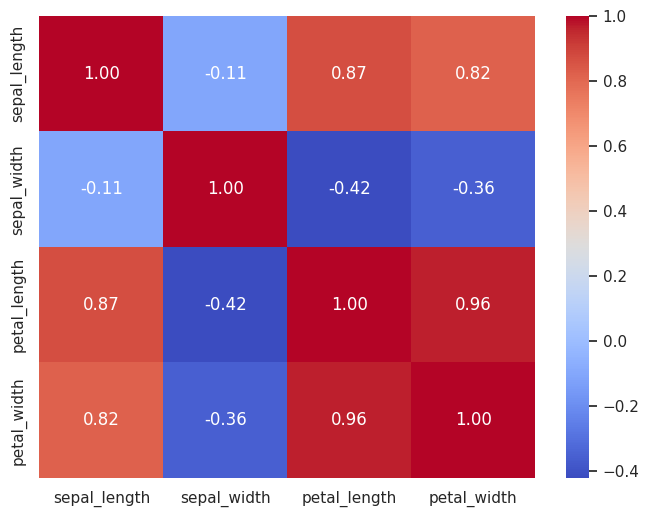

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Converting the Categorial Variables into Numerical variables

In [20]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [21]:
iris['species'] = label.fit_transform(iris['species'])

In [22]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Splitting the Dataset into Features (X) and Target Labels (y)

In [49]:
X = iris.drop("species", axis=1)
y = iris["species"]


In [50]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using StandardScaler() to Standardize the features by removing the Mean and Scaling to Unit Variance.

In [27]:
scaler = StandardScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training the model using KNN

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred = knn_model.predict(X_test_scaled)

Evaluating the Accuracy of the Classification Model

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


Depicting Classification Report and Confusion Matrix

In [33]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


Prediction of Species

In [34]:
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    model = knn_model
    new_data = [[sepal_length, sepal_width, petal_length, petal_width]]
    prediction = model.predict(new_data)
    return prediction[0]

In [35]:
predict_species(4.5, 3.5, 2.0, 0.9)

2

As per the model's analysis, the Iris Flower was categorized as being part of the Virginica species, specifically labeled as 2.